In [1]:
import sys
sys.path.append('../lib/python/')

import moving_edges

import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from tabulate import tabulate
import imageio

plt.rcParams['mathtext.fontset'] = 'cm'
import os
save_filepath = os.getcwd() + "/../figures/"


plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

import time


In [2]:
stimulus_df = pd.read_csv(r'../tiled_edge_stimuli.csv')

stimulus_df['Shape'] = stimulus_df['Shape'].map(lambda shape: list(map(int, shape.split(',')))) #convert shape to int list
stimulus_df['stimulus code'] = stimulus_df['stimulus code'].map(lambda code: list(map(int, code.strip('[]').split(',')))) #convert stimulus code to int list
stimulus_df.index = range(1, stimulus_df.shape[0] + 1)
stimulus_df['T'] = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['C'] = np.array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]) == 1
stimulus_df['CT'] = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XT'] = np.array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XC'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]) == 1
stimulus_df['XCT'] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]) == 1



def count_net_light_dark(stimulus_code):
    reshaped = np.reshape(stimulus_code, [-1, 2])
    net_light = 0
    net_dark = 0
    for cell in reshaped:
        if cell[0] == 1:
            net_light += cell[1]
        elif cell[0] == -1:
            net_dark += cell[1]
    return (net_light, net_dark)

stimulus_df[['net light', 'net dark']] = [count_net_light_dark(stimulus_df.loc[i, 'stimulus code']) for i in stimulus_df.index]
stimulus_df

,Stimulus type,Shape,stimulus code,net movement,discontinuity fraction,T,C,CT,XT,XC,XCT,net light,net dark
1,"T, net zero 1","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1,...",0,0.0,True,False,False,False,False,False,0,0
2,"T, net zero 2","[2, 4]","[1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, ...",0,0.0,True,False,False,False,False,False,-2,2
3,"C, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, ...",0,0.0,False,True,False,False,False,False,0,0
4,"C, net motion","[2, 4]","[1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -...",4,0.0,False,True,False,False,False,False,2,2
5,"TC, net zero 1","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, ...",0,0.0,False,False,True,False,False,False,0,0
6,"TC, net zero 2","[2, 4]","[1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1,...",0,0.5,False,False,True,False,False,False,0,0
7,"TX, net zero","[2, 4]","[1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1,...",0,0.0,False,False,False,True,False,False,0,0
8,"TX, net motion","[2, 4]","[1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -...",4,0.0,False,False,False,True,False,False,2,2
9,"CX, net zero 1","[2, 4]","[1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1,...",0,0.0,False,False,False,False,True,False,2,-2
10,"CX, net zero 2","[2, 4]","[1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1,...",0,0.0,False,False,False,False,True,False,2,-2


# Code for creating movies
Options: randomize x phase, randomize t phase
fps = 100 default?
Set default cell/stimulus width and default edge speed

Making movie interleave
frame 0 of 30 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


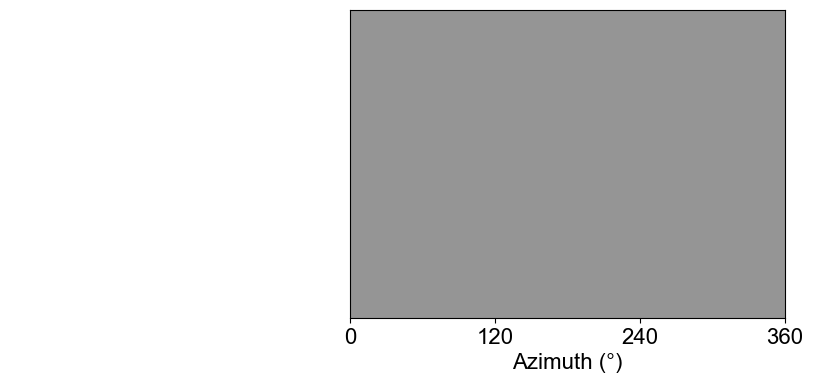

In [3]:
moving_edges.make_movie((1, 1), "interleave", "interleave", save_filepath + "movie1/", duration = 1)

Making movie s_1
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_2
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_3
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_4
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_5
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_6
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_7
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_8
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_9
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_10
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_11
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Making movie s_12
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_13
Making movie s_13
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_14
Making movie s_14
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_15
Making movie s_15
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_16
Making movie s_16
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_17
Making movie s_17
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_18
Making movie s_18
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_19
Making movie s_19
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_20
Making movie s_20
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
d:\TimeReversalSymmetry\figure_scripts\../lib/python\moving_edges.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 4))


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_21
Making movie s_21
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_22
Making movie s_22
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_23
Making movie s_23
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


making path d:\TimeReversalSymmetry\figure_scripts/../figures/movie1/s_24
Making movie s_24
frame 0 of 90 done
frame 30 of 90 done
frame 60 of 90 done


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2440, 1151) to (2448, 1152) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


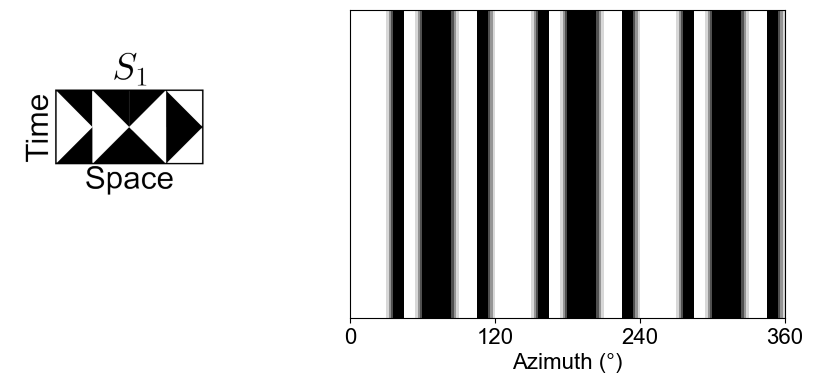

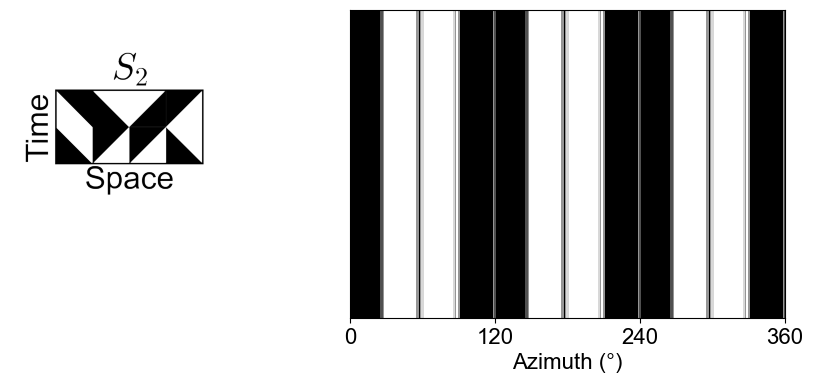

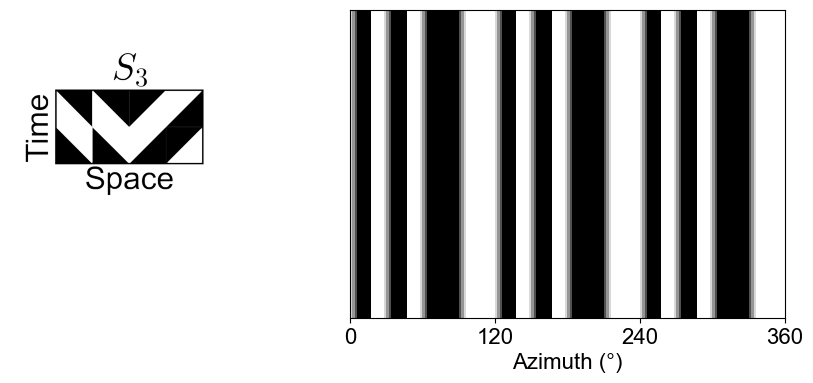

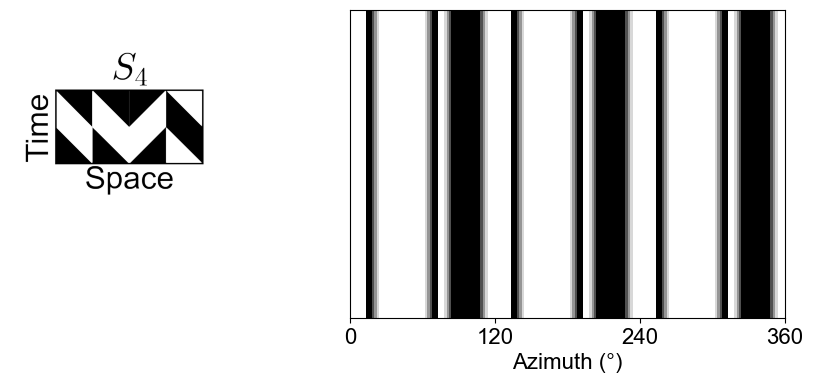

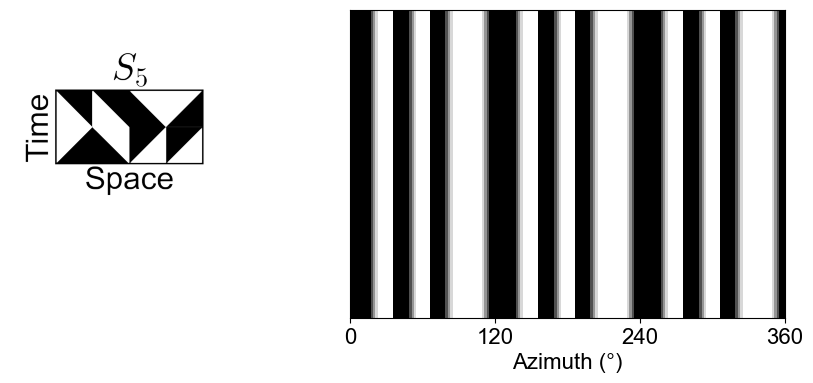

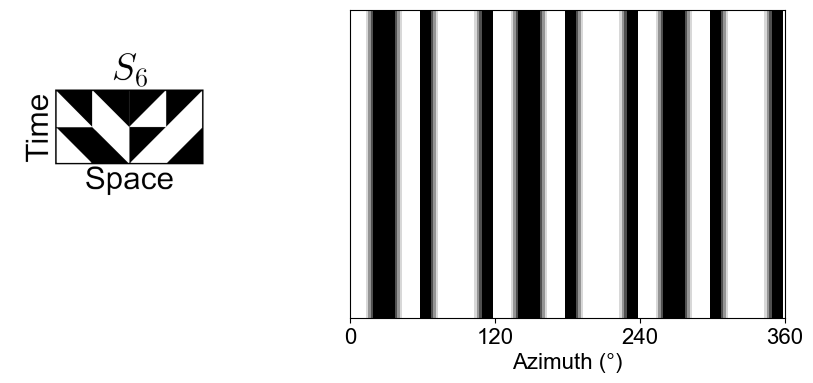

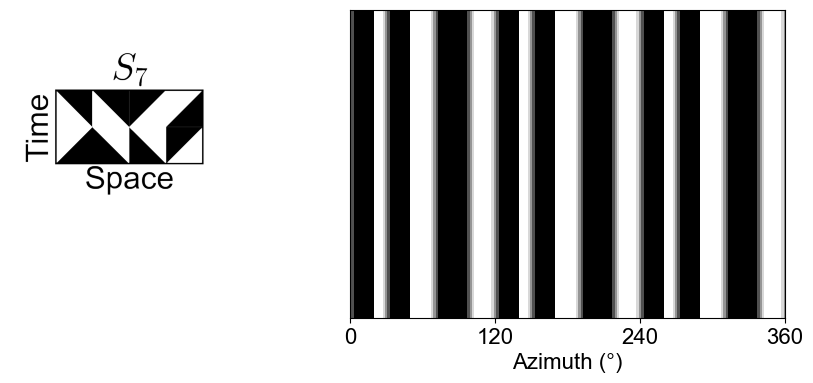

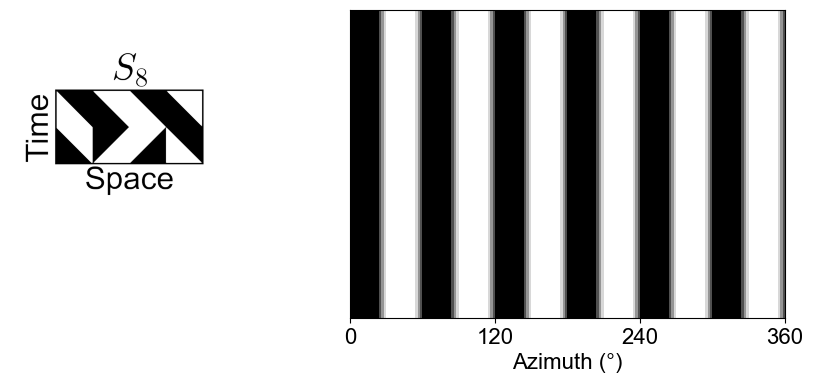

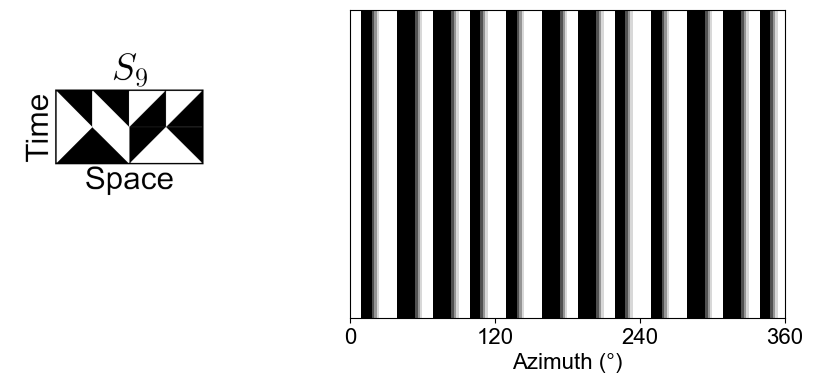

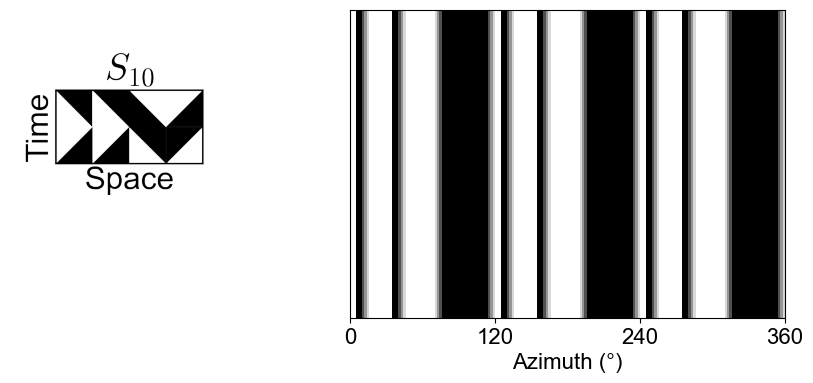

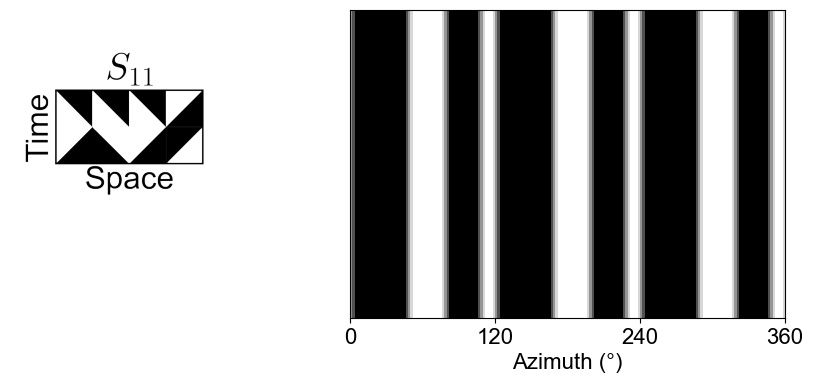

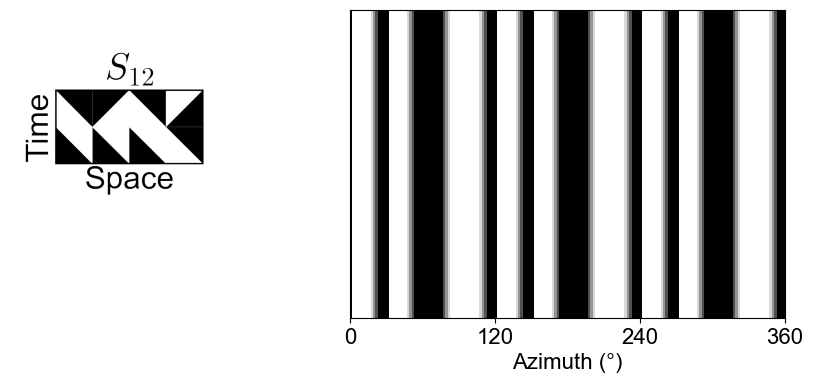

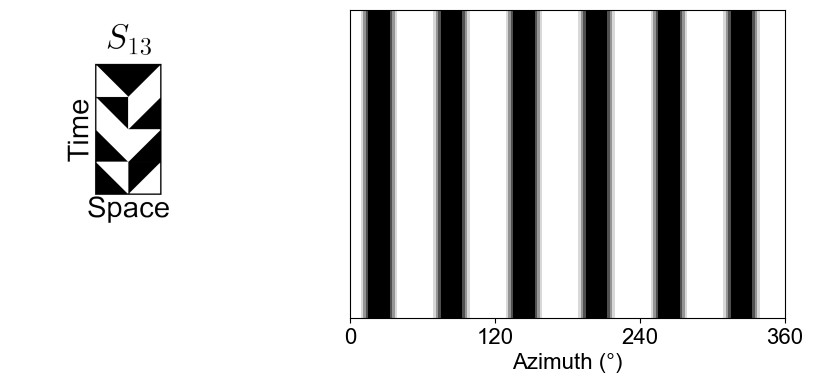

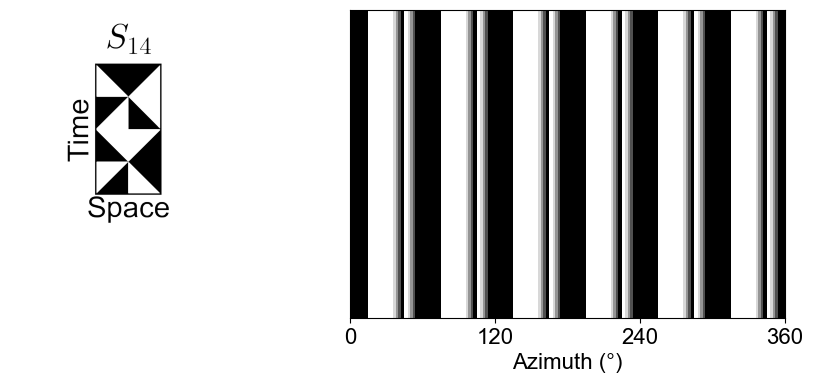

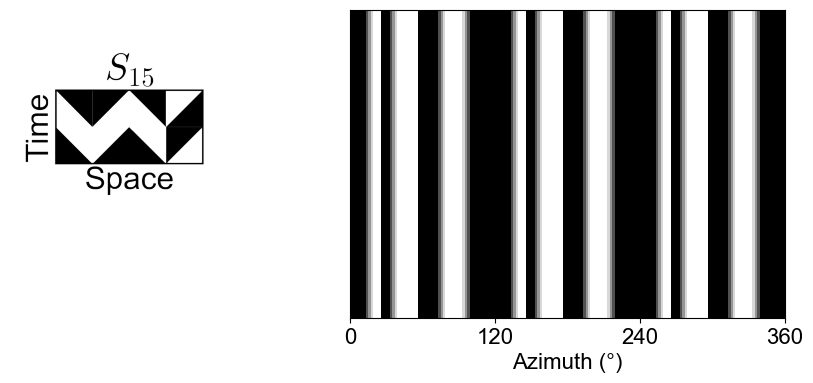

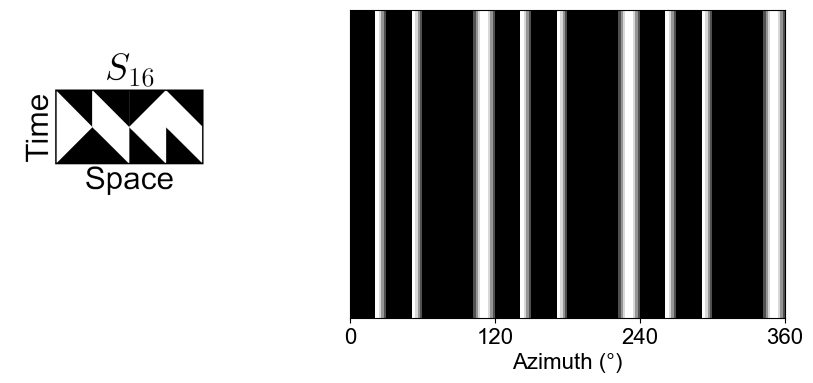

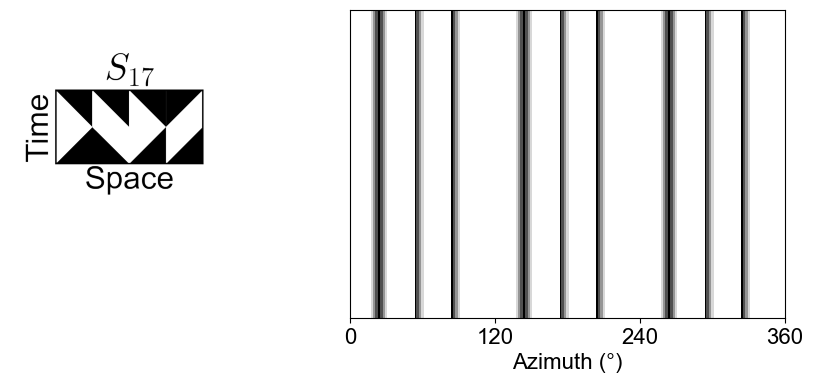

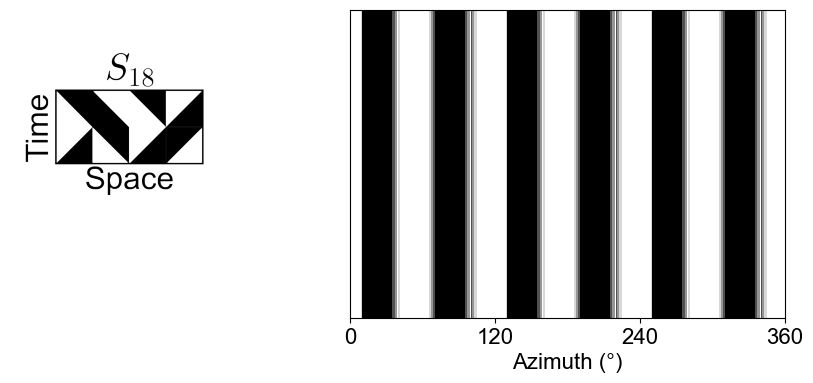

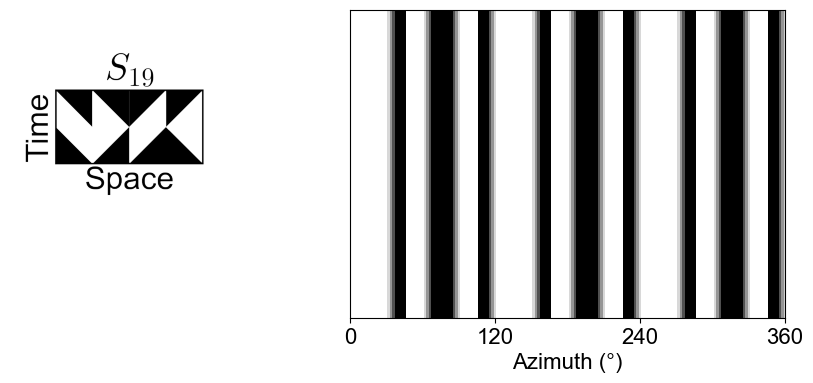

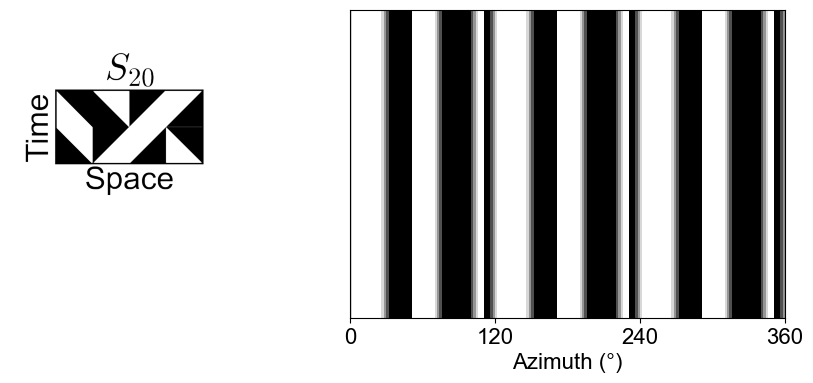

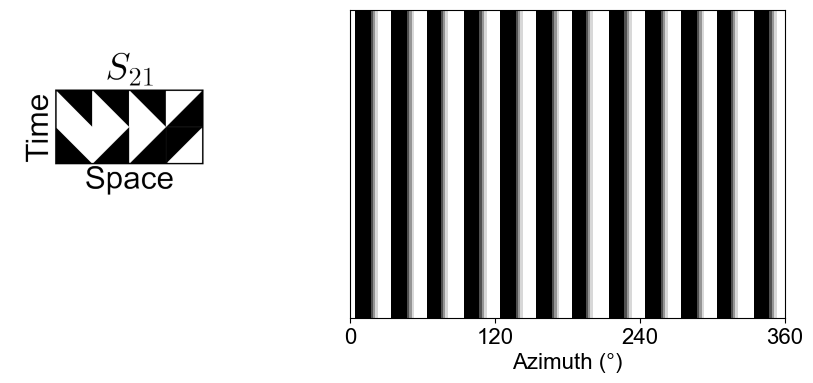

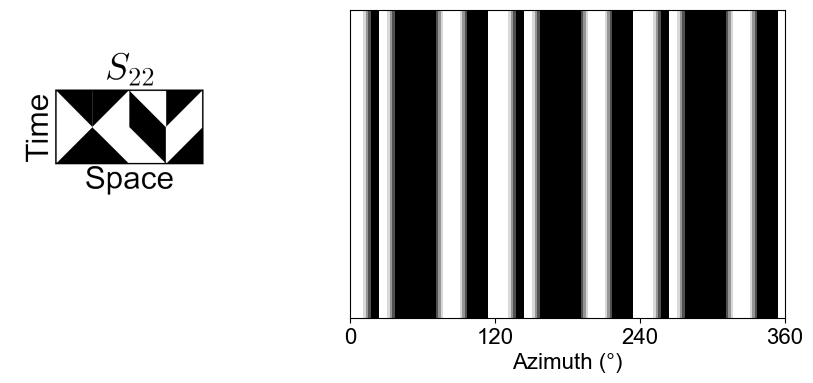

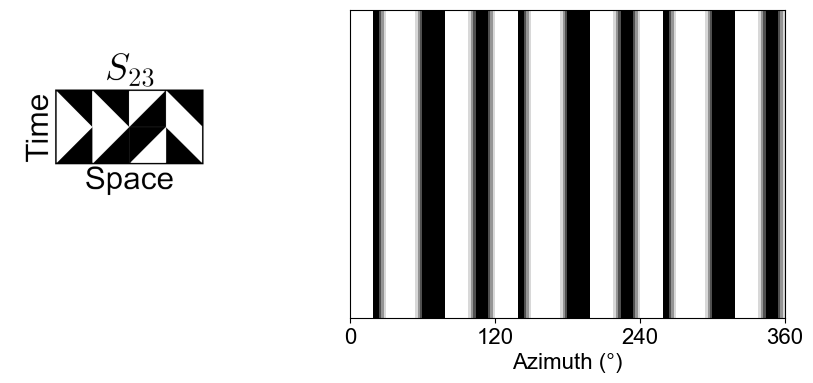

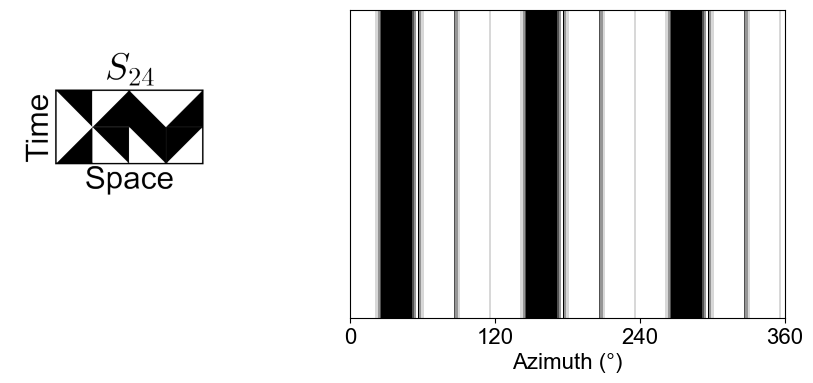

In [4]:
error_counter = 0

for i in range (1, 25):
    shape = stimulus_df.loc[i, "Shape"]
    stimulus = stimulus_df.loc[i, "stimulus code"]
    movie_save_path = save_filepath + 'movie1/'
    movie_save_name = 's_' + str(i)
    xt_plot_filepath = save_filepath + 'table1/all_stimuli_xtplots/s' + str(i) + '.png'
    try:
        moving_edges.make_movie(shape, stimulus, movie_save_name, movie_save_path, duration = 3, xt_plot_filepath = xt_plot_filepath, height = 1, fps = 30)
    except (MemoryError, IOError) as err:
        print(err)
        print("trying again: error counter = " + error_counter)
        time.sleep(10)
        if error_counter == 5:
            sys.exit()
        
        i = i - 1